# Summarize data on equivalent width
========================================================

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import re
import os
import pandas as pd
import sys

In [73]:
%config InlineBackend.rc = {}
mpl.rc_file("../templates/matplotlibrc")

In [74]:
sys.path.append('../humidity')
import humidity as hum
import libhumidity_ctio as humctio

In [75]:
!ls -l ../ana_31may17/HD111980_2/spectrum_eqwana 

total 16
-rw-r--r--  1 dagoret-campagnesylvie  staff  4943 Jul 10 11:48 AnaEqWdtFromSpectra_HD111980_May_31th.csv


In [76]:
!ls -l ../ana_05jun17/HD205905/spectrum_eqwana

total 24
-rw-r--r--  1 dagoret-campagnesylvie  staff  10660 Jul  4 15:22 AnaEqWdtFromSpectra_HD205905_Jun_05th.csv


In [77]:
!ls -l ../ana_08jun17/HD205905/spectrum_eqwana

total 16
-rw-r--r--  1 dagoret-campagnesylvie  staff  7072 Jul  6 16:04 AnaEqWdtFromSpectra_HD205905_Jun_08th.csv


In [78]:
!ls -l ../ana_10jun17/HD160617_HD185975_HD205905/spectrum_eqwana

total 32
-rw-r--r--  1 dagoret-campagnesylvie  staff  15283 Jul  7 13:24 AnaEqWdtFromSpectra_HD185975_HD205905_Jun_10th.csv


In [79]:
files=['../ana_31may17/HD111980_2/spectrum_eqwana/AnaEqWdtFromSpectra_HD111980_May_31th.csv',
#      '../ana_05jun17/HD205905/spectrum_eqwana/AnaEqWdtFromSpectra_HD205905_Jun_05th.csv',
      '../ana_08jun17/HD205905/spectrum_eqwana/AnaEqWdtFromSpectra_HD205905_Jun_08th.csv',
      '../ana_10jun17/HD160617_HD185975_HD205905/spectrum_eqwana/AnaEqWdtFromSpectra_HD185975_HD205905_Jun_10th.csv']

In [80]:
df1=pd.read_csv(files[0])

In [81]:
df2=pd.read_csv(files[1])

In [82]:
#df3=pd.read_csv(files[2])

In [83]:
#df4=pd.read_csv(files[3])

# First dataset

## extract simulation

In [100]:
ratio1_sim=df1['EQW_H2O_SIM']/df1['EQW_O2_SIM']
hum1_sim=df1['humidity']

## Extract Thorlab

In [85]:
df1_thor300=df1[df1['disperser']=='Thor300']

In [121]:
ratio1_thor300=df1_thor300['EQW_H2O_DATA']/df1_thor300['EQW_O2_DATA']
ratio1_thor300_err=ratio1_thor*np.sqrt(  (df1_thor300['EQW_H2O_DATA_ERR']/df1_thor300['EQW_H2O_DATA'])**2 +  (df1_thor300['EQW_O2_DATA_ERR']/df1_thor300['EQW_O2_DATA'])**2 )
hum1_thor300=df1_thor300['humidity']

## Extract HoloPhP

In [146]:
df1_holophp=df1[df1['disperser']=='HoloPhP']

In [150]:
ratio1_holophp=df1_holophp['EQW_H2O_DATA']/df1_holophp['EQW_O2_DATA']
ratio1_holophp_err=ratio1_holophp*np.sqrt(  (df1_holophp['EQW_H2O_DATA_ERR']/df1_holophp['EQW_H2O_DATA'])**2 +  (df1_holophp['EQW_O2_DATA_ERR']/df1_holophp['EQW_O2_DATA'])**2 )
hum1_holophp=df1_holophp['humidity']

## Extract HoloAmAg


In [160]:
df1_holoamag=df1[df1['disperser']=='HoloAmAg']

In [162]:
ratio1_holoamag=df1_holoamag['EQW_H2O_DATA']/df1_holoamag['EQW_O2_DATA']
ratio1_holoamag_err=ratio1_holoamag*np.sqrt(  (df1_holoamag['EQW_H2O_DATA_ERR']/df1_holoamag['EQW_H2O_DATA'])**2 +  (df1_holoamag['EQW_O2_DATA_ERR']/df1_holoamag['EQW_O2_DATA'])**2 )
hum1_holoamag=df1_holoamag['humidity']

## Extract HoloPhAg

In [161]:
df1_holophag=df1[df1['disperser']=='HoloPhAg']

# Second dataset

In [94]:
ratio2_sim=df2['EQW_H2O_SIM']/df2['EQW_O2_SIM']
hum2_sim=df2['humidity']

In [136]:
df2_thor300=df2[(df2['disperser']=='Thor300')  & (df2['filter']=='RG715') & (df2['humidity']>0)]

## Extract Thorlab

In [137]:
ratio2_thor300=df2_thor300['EQW_H2O_DATA']/df2_thor300['EQW_O2_DATA']
ratio2_thor300_err=ratio2_thor300*np.sqrt(  (df2_thor300['EQW_H2O_DATA_ERR']/df2_thor300['EQW_H2O_DATA'])**2 +  (df2_thor300['EQW_O2_DATA_ERR']/df2_thor300['EQW_O2_DATA'])**2 )
hum2_thor300=df2_thor300['humidity']

In [138]:
df2_holophp=df2[(df2['disperser']=='HoloPhP')  & (df2['filter']=='RG715') ]

In [148]:
ratio2_holophp=df2_holophp['EQW_H2O_DATA']/df2_holophp['EQW_O2_DATA']
ratio2_holophp_err=ratio2_holophp*np.sqrt(  (df2_holophp['EQW_H2O_DATA_ERR']/df2_holophp['EQW_H2O_DATA'])**2 +  (df2_holophp['EQW_O2_DATA_ERR']/df2_holophp['EQW_O2_DATA'])**2 )
hum2_holophp=df2_holophp['humidity']

In [139]:
df2_holophag=df2[(df2['disperser']=='HoloPhAg')  & (df2['filter']=='RG715') ]

In [140]:
df2_holoamag=df2[(df2['disperser']=='HoloAmAg')  & (df2['filter']=='RG715') ]

In [163]:
ratio2_holoamag=df2_holoamag['EQW_H2O_DATA']/df2_holoamag['EQW_O2_DATA']
ratio2_holoamag_err=ratio2_holoamag*np.sqrt(  (df2_holoamag['EQW_H2O_DATA_ERR']/df2_holoamag['EQW_H2O_DATA'])**2 +  (df2_holoamag['EQW_O2_DATA_ERR']/df2_holoamag['EQW_O2_DATA'])**2 )
hum2_holoamag=df2_holoamag['humidity']

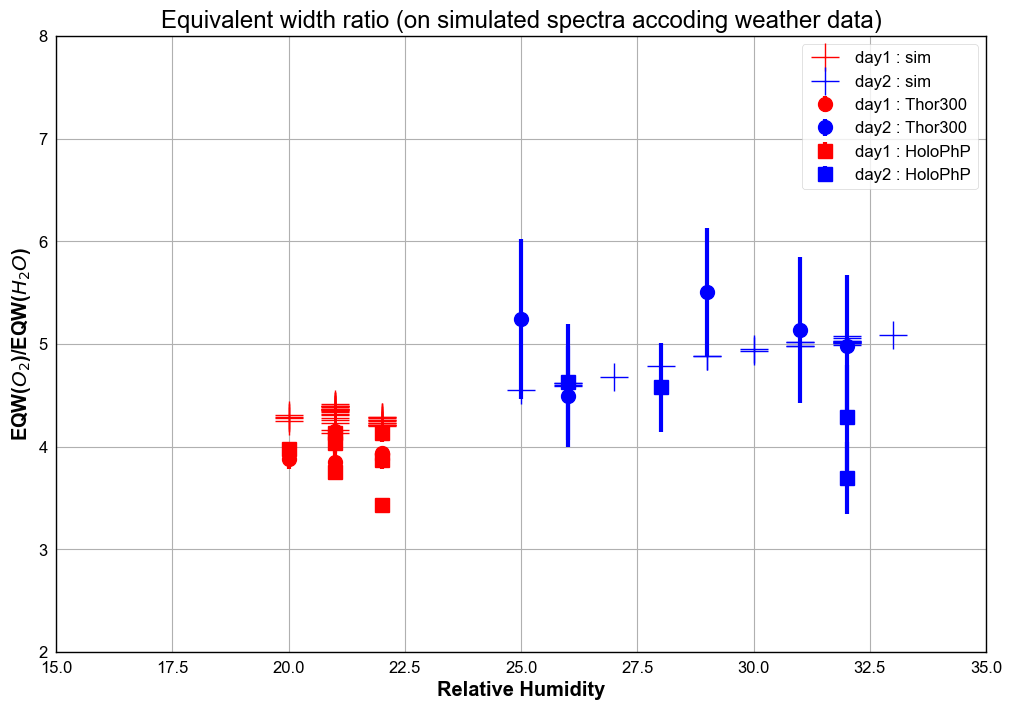

In [165]:
plt.figure(figsize=(12,8))
plt.plot(hum1_sim,ratio1_sim,'r+',markersize=20,lw=3,label='day1 : sim')
plt.plot(hum2_sim,ratio2_sim,'b+',markersize=20,lw=3,label='day2 : sim')

plt.errorbar(hum1_thor300,ratio1_thor300,yerr=ratio1_thor300_err,fmt='o',color='red',lw=3,markersize=10,label='day1 : Thor300')
plt.errorbar(hum2_thor300,ratio2_thor300,yerr=ratio2_thor300_err,fmt='o',color='blue',lw=3,markersize=10,label='day2 : Thor300')

plt.errorbar(hum1_holophp,ratio1_holophp,yerr=ratio1_holophp_err,fmt='s',color='red',lw=3,markersize=10,label='day1 : HoloPhP')
plt.errorbar(hum2_holophp,ratio2_holophp,yerr=ratio2_holophp_err,fmt='s',color='blue',lw=3,markersize=10,label='day2 : HoloPhP')

#plt.errorbar(hum1_holoamag,ratio1_holoamag,yerr=ratio1_holoamag_err,fmt='^',color='red',lw=3,markersize=10,label='day1 : HoloAmAg')
#plt.errorbar(hum2_holoamag,ratio2_holoamag,yerr=ratio2_holoamag_err,fmt='^',color='blue',lw=3,markersize=10,label='day2 : HoloAmAg')


plt.grid(True)
plt.grid(True)
plt.ylim(0,10)
plt.title("Equivalent width ratio (on simulated spectra accoding weather data)")
plt.xlabel("Relative Humidity")
plt.ylabel("EQW($O_2$)/EQW($H_2O$)")
plt.xlim(15.,35.)
plt.ylim(2.,8.)
plt.legend()

In [96]:
df3

,Unnamed: 0,airmass,time,filter,disperser,humidity,EQW_O2_DATA,EQW_H2O_DATA,EQW_O2_DATA_ERR,EQW_H2O_DATA_ERR,EQW_O2_SIM,EQW_H2O_SIM
0,0,1.874,2017-06-11T05:34:06.396,RG715,Thor300,23.0,4.025734,19.063204,4.548736,1.231684,3.615511,18.199969
1,1,1.873,2017-06-11T05:35:28.909,RG715,HoloPhP,23.0,4.424343,17.525003,0.096650,2.118329,3.614576,18.194597
2,2,1.873,2017-06-11T05:36:54.407,RG715,HoloPhAg,22.0,3.425240,53.141258,0.083056,NaN,3.601229,17.807943
3,3,1.873,2017-06-11T05:38:47.099,RG715,HoloAmAg,22.0,2.808846,56.666172,0.057121,NaN,3.601229,17.807943
4,4,1.393,2017-06-11T05:41:15.751,RG715,Thor300,22.0,3.692137,15.826494,0.138109,1.294727,3.030906,15.425039
5,5,1.387,2017-06-11T05:42:38.303,RG715,HoloPhP,23.0,4.082760,13.008149,0.087243,0.626337,3.034901,15.786401
6,6,1.380,2017-06-11T05:44:02.998,RG715,HoloPhAg,22.0,3.224354,21.986345,0.093289,0.162352,3.017468,15.397078
7,7,1.371,2017-06-11T05:45:55.408,RG715,HoloAmAg,22.0,1.235255,20.890675,0.289726,0.175117,3.007075,15.339231
8,8,1.867,2017-06-11T05:55:26.453,RG715,Thor300,23.0,4.670316,17.634077,1.835921,0.875395,3.606068,17.981623
9,9,1.867,2017-06-11T05:56:49.004,RG715,HoloPhP,23.0,3.521152,1.532835,0.173915,3.925233,3.600288,17.912047


In [97]:
ratio3=df3['EQW_H2O_DATA']/df3['EQW_O2_DATA']
hum3=df3['humidity']

(0, 10)

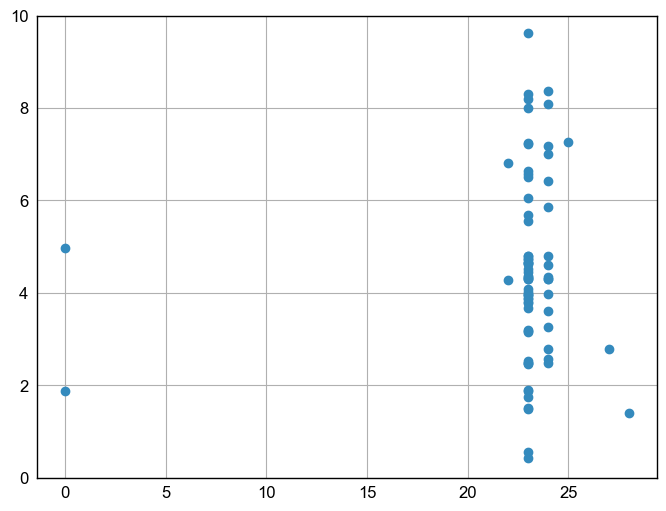

In [98]:
plt.plot(hum3,ratio3,'o')
plt.ylim(0,10)

In [99]:
ratio4=df4['EQW_H2O_DATA']/df4['EQW_O2_DATA']
hum4=df4['humidity']

NameError: name 'df4' is not defined

In [ ]:
plt.plot(hum4,ratio4,'o')
plt.ylim(0,10)